<a href="https://www.kaggle.com/code/shivamgarg1999/fraud-detection-using-svm-rbf?scriptVersionId=105969292" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
X = data.columns.drop('Class')
y = 'Class'

# Class Exploration

In [7]:
class_counts = data['Class'].value_counts(normalize = True, dropna = False).mul(100).round(5).astype(str)+'%'
class_counts

0    99.82725%
1     0.17275%
Name: Class, dtype: object

There is a large data imbalance between the negative class (0 = not fraudulent) and positive class (1 = fraudulent) 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

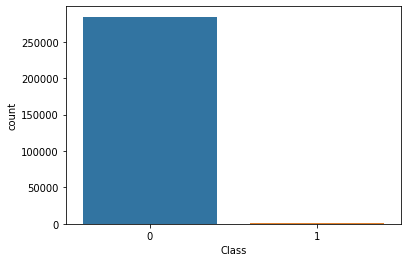

In [8]:
sns.countplot(data['Class'])

In [9]:
print("The ratio for positive to negative classes is:{}".format(len(data.loc[data['Class'] == 1])/len(data.loc[data['Class'] == 0])))

# We need to randomly resample so that we can get a 50%/0.5 ratio 

The ratio for positive to negative classes is:0.0017304750013189597


# Resampling

We will need to randomly undersample to make the ratio higher

In [10]:
np.random.seed(42)

In [11]:
def random_undersample(df, majority_class_value):
    
    majority_class_df = df.loc[df['Class'] == majority_class_value]
    minority_class_rows = len(df)-len(majority_class_df)
    
    print("There are {} records of the majority class, and {} records of the minority class".format(len(majority_class_df), minority_class_rows))
    
    print("To achieve a 50/50 split, we will randomly resample so that there are {} total records".format( ((minority_class_rows) * 2)) )
    
    
    randomly_sampled_majority_class_df = majority_class_df.sample(len(df)-len(majority_class_df)) 
    
    return randomly_sampled_majority_class_df
    

In [12]:
rand_sample_maj_class_df = random_undersample(data,0)

There are 284315 records of the majority class, and 492 records of the minority class
To achieve a 50/50 split, we will randomly resample so that there are 984 total records


In [13]:
rand_sample_maj_class_df['Class'].value_counts()

0    492
Name: Class, dtype: int64

In [14]:
rand_sample_maj_class_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.00000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,95052.75813,0.153312,0.009649,-0.038029,-0.027323,0.061966,-0.053962,0.013795,0.014911,0.037348,...,0.014059,-0.020781,0.013223,-0.007257,0.024646,-0.027696,0.011070,-0.002305,80.348354,0.0
std,47120.58579,1.703663,1.444666,1.374647,1.372193,1.170107,1.270228,0.929036,0.956193,1.131578,...,0.740079,0.712191,0.466418,0.632845,0.531146,0.465194,0.302420,0.205858,178.030395,0.0
min,607.00000,-10.979719,-8.372439,-7.679816,-4.519509,-4.643416,-5.078603,-5.157107,-13.396938,-3.044822,...,-2.446716,-3.678196,-1.415962,-2.836627,-2.356325,-1.178778,-1.919677,-1.831964,0.000000,0.0
25%,54146.25000,-0.886609,-0.557728,-1.013043,-0.797339,-0.578016,-0.809724,-0.513647,-0.230213,-0.644018,...,-0.218049,-0.548167,-0.171455,-0.359669,-0.303849,-0.343016,-0.072520,-0.050755,4.000000,0.0
50%,88177.50000,0.119505,0.059954,0.067108,-0.027450,0.046396,-0.267628,0.078284,0.016143,-0.040850,...,-0.023481,0.020152,-0.008901,0.043037,0.037298,-0.050608,-0.005048,0.010790,19.975000,0.0
75%,139335.50000,1.477671,0.751157,0.952021,0.709696,0.603506,0.308306,0.573727,0.278094,0.683866,...,0.160625,0.494733,0.158984,0.443805,0.354632,0.196191,0.070341,0.079316,69.382500,0.0
max,171917.00000,2.351891,9.441250,3.143387,5.481640,7.044201,4.661863,3.424011,3.942467,5.232322,...,13.250231,1.999206,6.008724,1.205581,1.957821,2.468952,2.175752,1.143922,1464.940000,0.0


In [15]:
resampled_df = pd.concat([rand_sample_maj_class_df,data.loc[data['Class'] == 1]])

In [16]:
resampled_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

# Feature Scaling using Z-Score

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

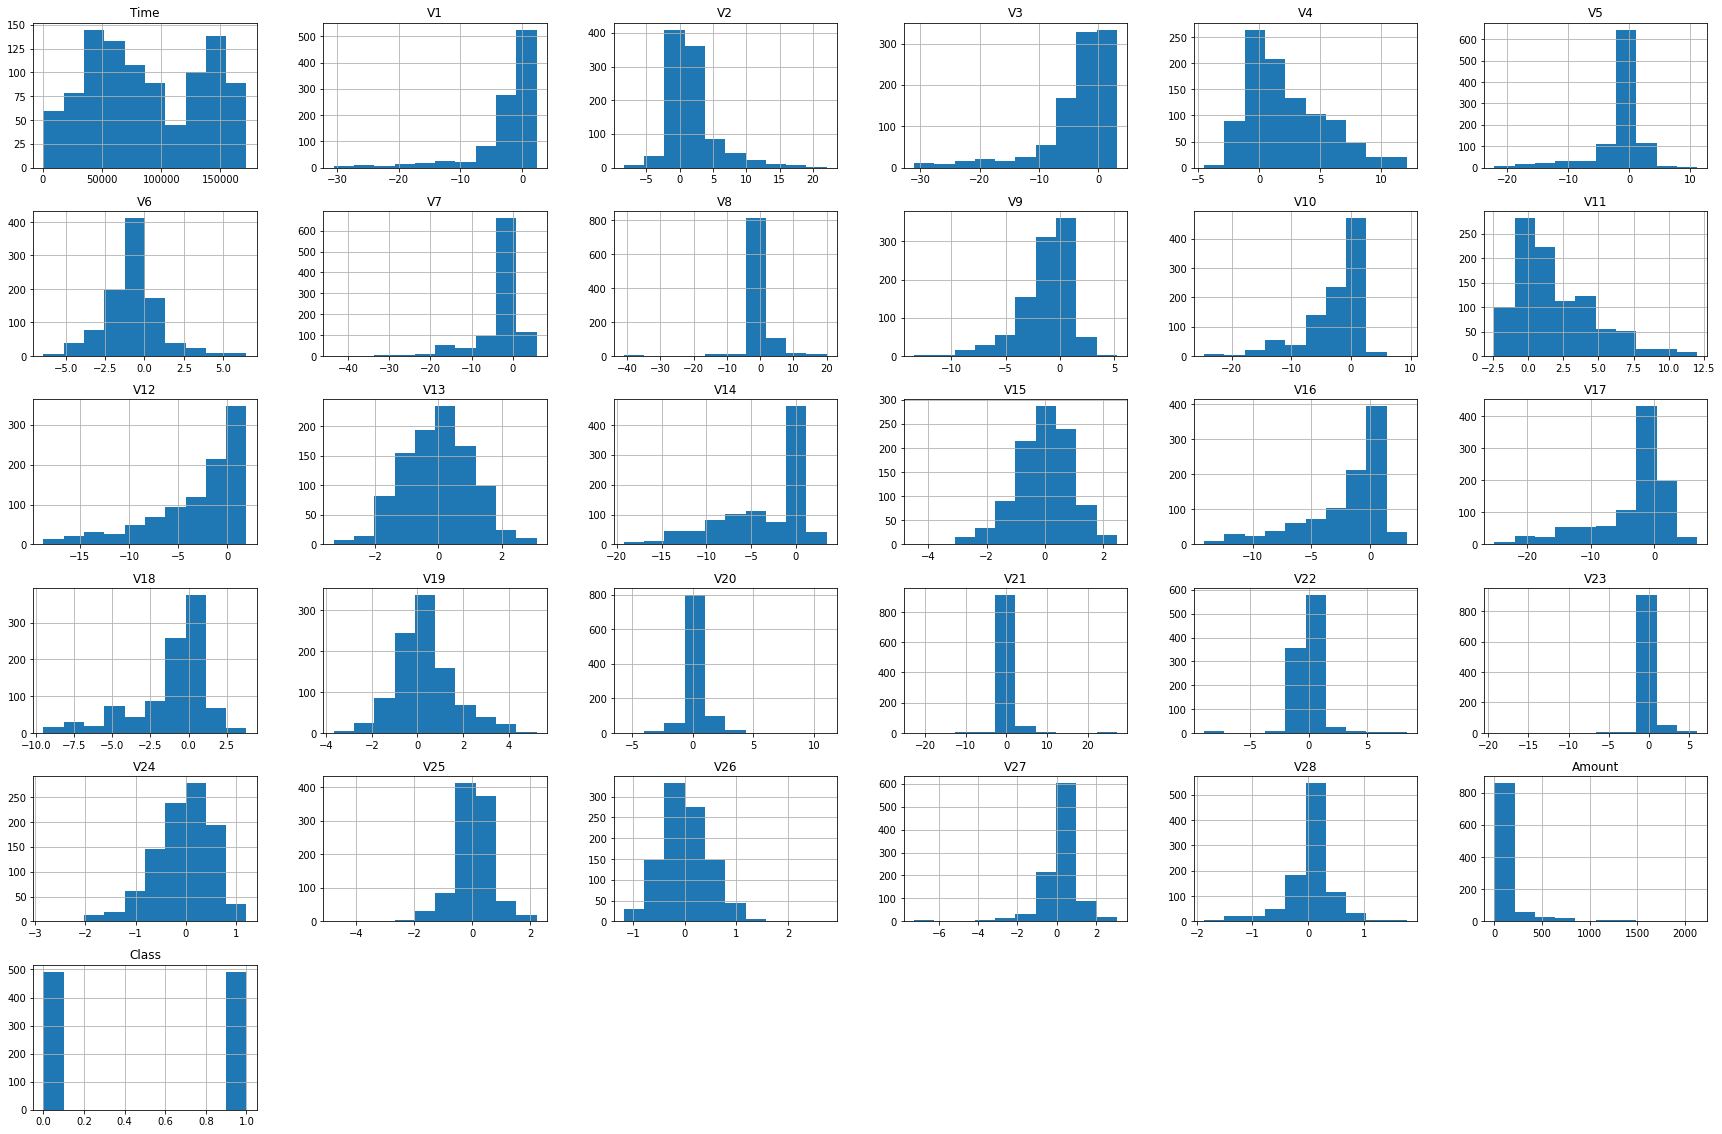

In [17]:
resampled_df.hist(figsize = (30,20))

In [18]:
from scipy.stats import zscore

normalized_df = resampled_df[X].apply(zscore)
normalized_df = normalized_df.assign(Class = resampled_df[y])

In [19]:
normalized_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

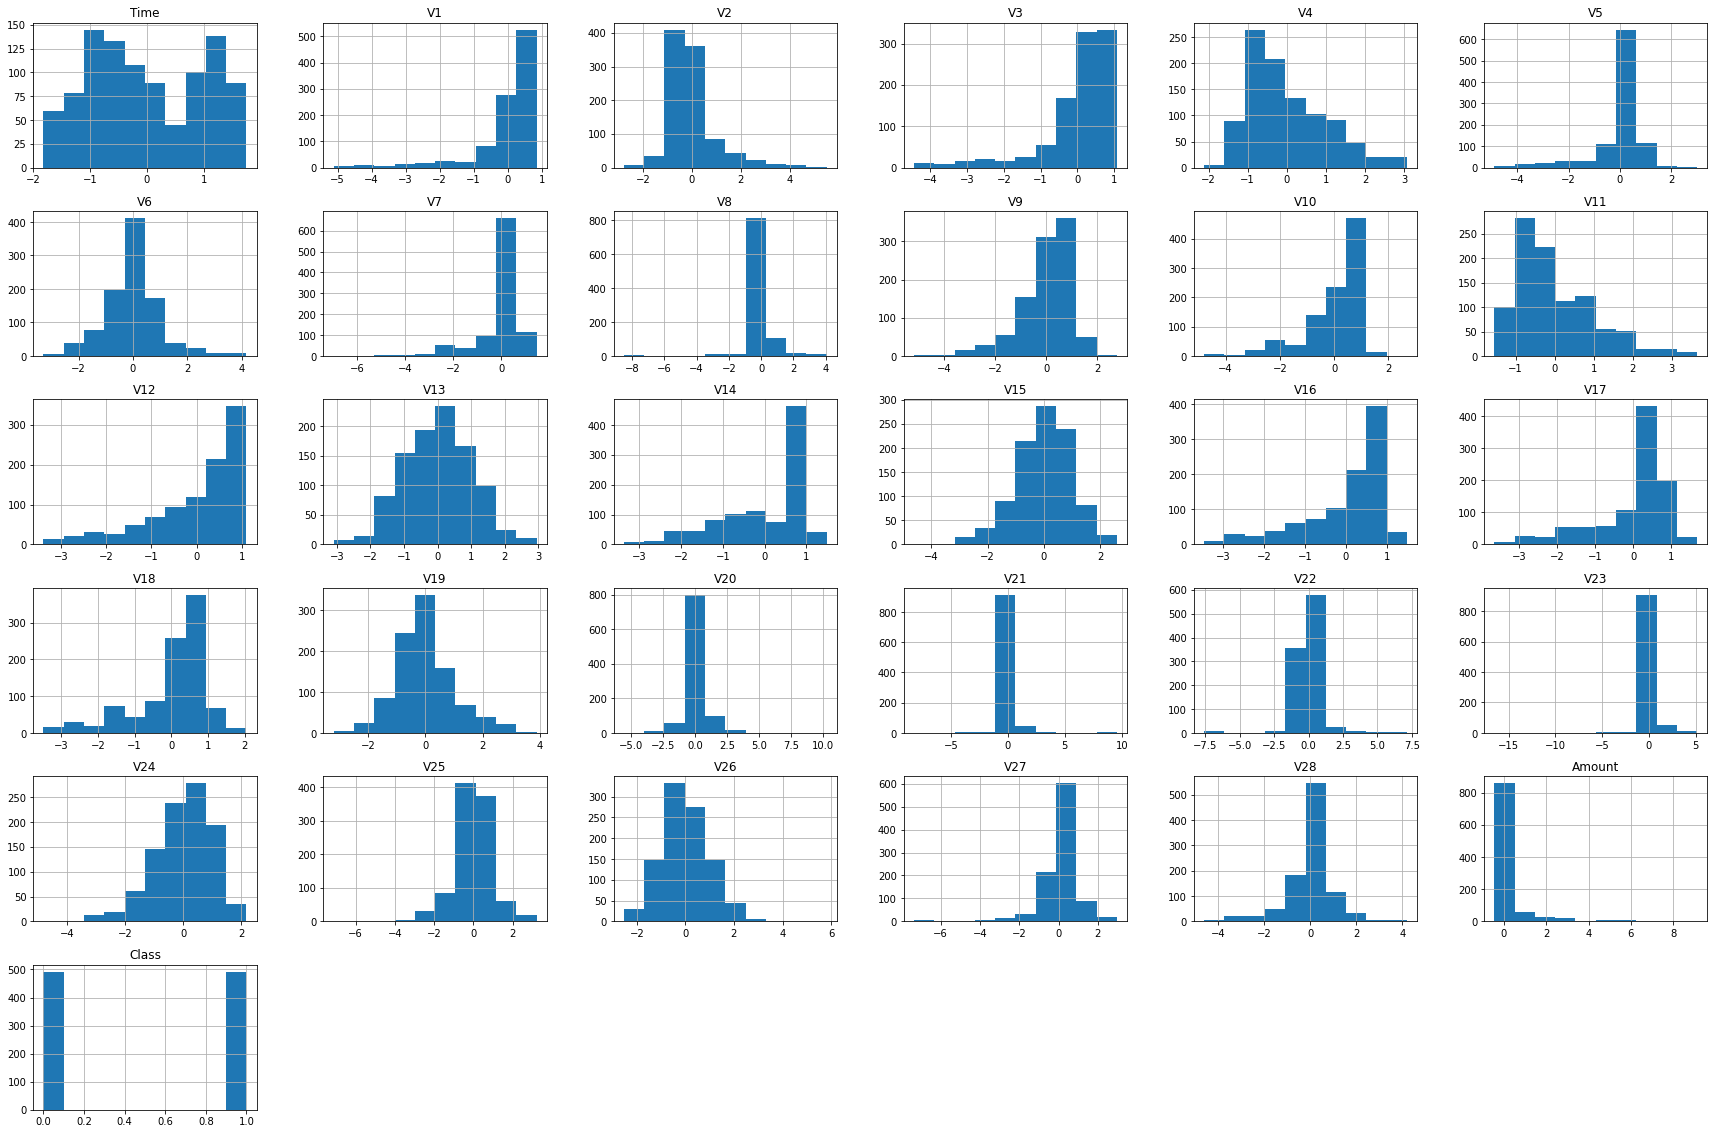

In [20]:
normalized_df.hist(figsize = (30,20))

The features are on much similar scales as a result of z-score transformation

In [21]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [22]:
normalized_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.00000,984.00000,984.00000,984.00000,984.00000,984.00000,984.00000,984.00000,984.00000,984.00000,...,984.00000,984.00000,984.00000,984.00000,984.00000,984.00000,984.00000,984.00000,984.00000,984.00000
mean,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,...,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.50000
std,1.00051,1.00051,1.00051,1.00051,1.00051,1.00051,1.00051,1.00051,1.00051,1.00051,...,1.00051,1.00051,1.00051,1.00051,1.00051,1.00051,1.00051,1.00051,1.00051,0.50025
min,-1.82403,-5.11609,-2.78169,-4.44833,-2.11376,-4.89175,-3.29094,-6.97954,-8.51059,-5.19831,...,-8.25816,-7.59524,-16.53311,-4.80476,-7.11458,-2.53541,-7.36236,-4.59403,-0.45693,0.00000
25%,-0.87501,-0.08611,-0.53562,-0.24999,-0.74793,-0.05481,-0.50635,-0.04945,-0.10739,-0.46248,...,-0.18853,-0.46039,-0.19906,-0.59325,-0.50685,-0.65791,-0.15372,-0.22578,-0.45161,0.00000
50%,-0.14691,0.27622,-0.23848,0.34960,-0.29779,0.28653,0.03138,0.36665,-0.03004,0.24344,...,-0.08092,0.03355,-0.01888,0.11349,0.03714,-0.05614,-0.04839,-0.01132,-0.38078,0.50000
75%,0.97209,0.62219,0.26736,0.60697,0.60681,0.48459,0.46307,0.52438,0.11842,0.62591,...,0.10386,0.47608,0.17712,0.75670,0.54375,0.59173,0.36497,0.42242,-0.00582,1.00000
max,1.75155,0.84435,5.50984,1.07772,3.07458,3.00718,4.17129,1.46849,4.05886,2.78000,...,9.56940,7.15211,5.17478,2.18042,3.21422,5.81983,2.96478,4.20045,9.13410,1.00000


# Scaling Features

In [23]:
normalized_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_df[X],normalized_df[y], random_state = 42)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((738, 30), (738,), (246, 30), (246,))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

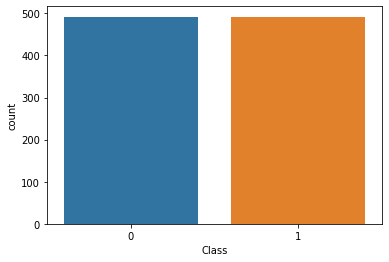

In [26]:
sns.countplot(resampled_df['Class'])

# Validation Curve for Gamma

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

clf = SVC(kernel = 'rbf', C = 0.5, gamma = 0.1, random_state= 42)

gamma_range = np.logspace(-4,1,30)

train_scores, test_scores = validation_curve(
clf,
normalized_df[X],
normalized_df[y],
param_name = 'gamma',
param_range = gamma_range,
scoring = 'accuracy')

train_scores, test_scores = np.array([np.mean(row) for row in train_scores]),np.array([np.mean(row) for row in test_scores])

print(train_scores,'\n'*2, test_scores)

[0.67097375 0.69104806 0.71569508 0.78150207 0.82876212 0.86305865
 0.88439941 0.89964332 0.90802734 0.91158418 0.91412483 0.91844471
 0.92632112 0.93216481 0.93927818 0.94461394 0.95020221 0.95604558
 0.96036513 0.96188927 0.96696992 0.97916524 0.99136121 0.99771283
 0.99872935 0.99847522 0.99872935 0.99923761 0.84650572 0.68421591] 

 [0.65939086 0.67259919 0.70615353 0.77430851 0.81496426 0.8566456
 0.88002175 0.8932508  0.90544908 0.91054076 0.91156117 0.91155599
 0.91155599 0.91663214 0.92273904 0.92274422 0.91969854 0.92680514
 0.91867813 0.89632239 0.86993163 0.82217445 0.76628509 0.59546255
 0.50711178 0.50101523 0.5        0.5        0.5        0.5       ]


In [28]:
max_test_gamma = test_scores.argmax()
max_test_gamma

17

In [29]:
train_scores[test_scores.argmax()]

0.9560455756293578

In [30]:
test_scores[test_scores.argmax()]

0.9268051382989745

In [31]:
print("The best optimized model is when gamma is {:.3}, with a training set score of {:.5%}, and a test set score of {:.5%}".format(gamma_range[max_test_gamma],train_scores[max_test_gamma], test_scores[max_test_gamma]))

The best optimized model is when gamma is 0.0853, with a training set score of 95.60456%, and a test set score of 92.68051%


Text(0, 0.5, 'R2')

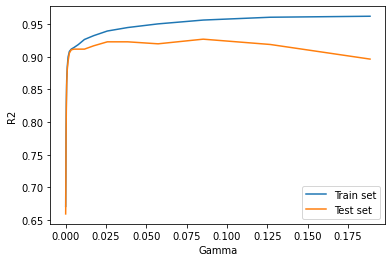

In [32]:
import matplotlib.pyplot as plt

plt.plot(gamma_range[0:20], train_scores[0:20], label = 'Train set' )
plt.plot(gamma_range[0:20], test_scores[0:20], label = 'Test set' )
plt.legend()
plt.xlabel("Gamma")
plt.ylabel('R2')

# Validation Curve for C

In [33]:
from sklearn.svm import SVC

from sklearn.model_selection import validation_curve

C_range = np.logspace(-4,1,30)

train_scores, test_scores = validation_curve(
clf,
normalized_df[X],
normalized_df[y],
param_name = 'C',
param_range = C_range,
scoring = 'accuracy')

train_scores, test_scores = np.array([np.mean(row) for row in train_scores]),np.array([np.mean(row) for row in test_scores])

print(train_scores,'\n'*2 ,test_scores)

[0.57106663 0.57106663 0.57106663 0.57106663 0.57106663 0.57106663
 0.57106663 0.57106663 0.57106663 0.57106663 0.57106663 0.63332839
 0.85086333 0.86585408 0.87779494 0.89456266 0.90726495 0.91666645
 0.92606538 0.93140113 0.93775211 0.95197982 0.96214372 0.9672247
 0.97256045 0.97713382 0.98348512 0.98831294 0.99186947 0.99695077] 

 [0.5673573  0.5673573  0.5673573  0.5673573  0.5673573  0.5673573
 0.5673573  0.5673573  0.5673573  0.5673573  0.5673573  0.60187506
 0.83131669 0.85772817 0.8668704  0.8790635  0.88617528 0.89632757
 0.90242412 0.9125764  0.9125764  0.92273904 0.92477468 0.92679996
 0.92578991 0.9247695  0.921729   0.92274422 0.92478504 0.92173936]


In [34]:
print("The best optimized model is when C is {:.3}, with a training set score of {:.5%}, and a test set score of {:.5%}".format(C_range[test_scores.argmax()],train_scores[test_scores.argmax()], test_scores[test_scores.argmax()]))

The best optimized model is when C is 0.924, with a training set score of 96.72247%, and a test set score of 92.68000%


Text(0, 0.5, 'R2')

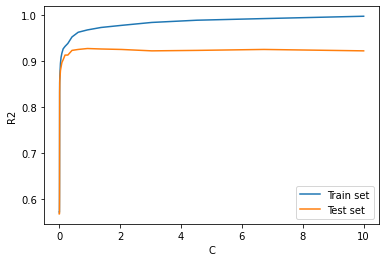

In [35]:
import matplotlib.pyplot as plt

plt.plot(C_range, train_scores, label = 'Train set')
plt.plot(C_range, test_scores, label = 'Test set')
plt.legend()
plt.xlabel("C")
plt.ylabel('R2')

# Training an SVC Model

In [36]:
from sklearn import svm

clf = svm.SVC(kernel = 'rbf', C = 0.9236708571873865, gamma = 'scale', random_state= 42)
clf.fit(X_train, y_train)

print("Train accuracy of {:.2%}".format(clf.score(X_train, y_train)))
print("Test accuracy of {:.2%}".format(clf.score(X_test, y_test)))

Train accuracy of 94.72%
Test accuracy of 93.50%


# Principal Component Analysis

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df[X])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [38]:
normalized_df.index

Int64Index([138028,  63099,  73411, 164247, 148999,  38488, 153861,  20458,
            158719,  10980,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=984)

In [39]:
principalDf.index = normalized_df.index
principalDf['Class'] = normalized_df[y].to_list()

In [40]:
principalDf.reset_index(drop = True, inplace = True)

In [41]:
principalDf.iloc[:,0:2]

,principal component 1,principal component 2
0,-2.10336,-0.45595
1,-1.85047,0.58328
2,-1.76138,-0.25068
3,-2.17640,0.49998
4,-2.20759,1.10052
...,...,...
979,0.62062,-0.48420
980,-0.24864,-0.49309
981,-0.55910,0.44721
982,0.52803,-0.53189


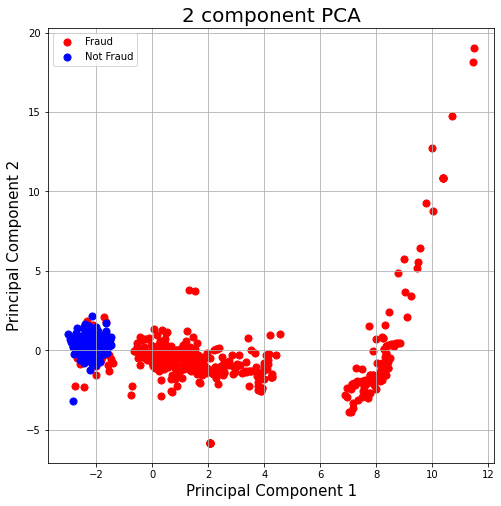

In [42]:
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r','b']

for target, color in zip(targets,colors):
    indicesToKeep = principalDf['Class'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Fraud', 'Not Fraud'])
ax.grid()

In [43]:
## Univariate F-value (feature ranking) test